In [1]:
!pip install hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
#import all the neceesaary libraries to preprocess the data and also to implement hdbscan algoithm

In [2]:
#load all the 3 datasets

dataset1 = pd.read_csv('/Users/DELL/Desktop/DMG/assignment3/drive-download-20231027T110025Z-001/DBC_Customers_1.csv')
dataset2 = pd.read_csv('/Users/DELL/Desktop/DMG/assignment3/drive-download-20231027T110025Z-001/HBC_timesData_2.csv')
dataset3 = pd.read_csv('/Users/DELL/Desktop/DMG/assignment3/drive-download-20231027T110025Z-001/PBC_userprofile_3.csv')

(d)  Implement the chosen algorithm using any library on all the 3 datasets
and show the best results obtained respectively.

# for the 1 dataset 

In [3]:
dataset1

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                1            4  
1          Engineer                3            3  
2          Engineer                1            1  
3            Lawyer                0            2  
4     Entertainment                2            6  
...             ...              ...          ...  
1995         Artist                8            7  
1996         Doctor                7            7  
1997     Healthcare                9            2  
1998      Executive                7            2  
1999  Entertainment                5            2  

[2000 rows x 8 columns]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.datasets import make_blobs


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Encode the categorical features in the dataset
for col in dataset1.columns:
    if dataset1[col].dtype == 'object':
        dataset1[col] = label_encoder.fit_transform(dataset1[col])

# Split the data into features and target
X = dataset1.drop('CustomerID', axis=1).to_numpy()
y = dataset1['CustomerID'].to_numpy()

# Standardize the data
X_std = StandardScaler().fit_transform(X)


In [6]:
print(X)

[[     1     19  15000 ...      5      1      4]
 [     1     21  35000 ...      2      3      3]
 [     0     20  86000 ...      2      1      1]
 ...
 [     1     87  90961 ...      5      9      2]
 [     1     77 182109 ...      4      7      2]
 [     1     90 110610 ...      3      5      2]]


In [7]:
# Set the minimum cluster size
min_cluster_size = 10

# Create the HDBSCAN clusterer
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)


In [8]:
clusterer.fit(X_std)


HDBSCAN(min_cluster_size=10)

In [9]:
import numpy as np

# Convert your data to a numpy array
X = np.array(dataset1)


In [10]:
print(X)

[[   1    1   19 ...    5    1    4]
 [   2    1   21 ...    2    3    3]
 [   3    0   20 ...    2    1    1]
 ...
 [1998    1   87 ...    5    9    2]
 [1999    1   77 ...    4    7    2]
 [2000    1   90 ...    3    5    2]]


In [11]:
import hdbscan

# Create an HDBSCAN clusterer
clusterer = hdbscan.HDBSCAN()

# Fit the HDBSCAN clusterer to the data
clusterer.fit(X)


HDBSCAN()

In [12]:
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = dataset1.drop('CustomerID', axis=1).to_numpy()
y = dataset1['CustomerID'].to_numpy()

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Create an HDBSCAN clusterer
clusterer = hdbscan.HDBSCAN()

# Fit the HDBSCAN clusterer to the data and obtain cluster labels
cluster_labels = clusterer.fit_predict(X_std)

# Now 'cluster_labels' contains the cluster assignments for each data point


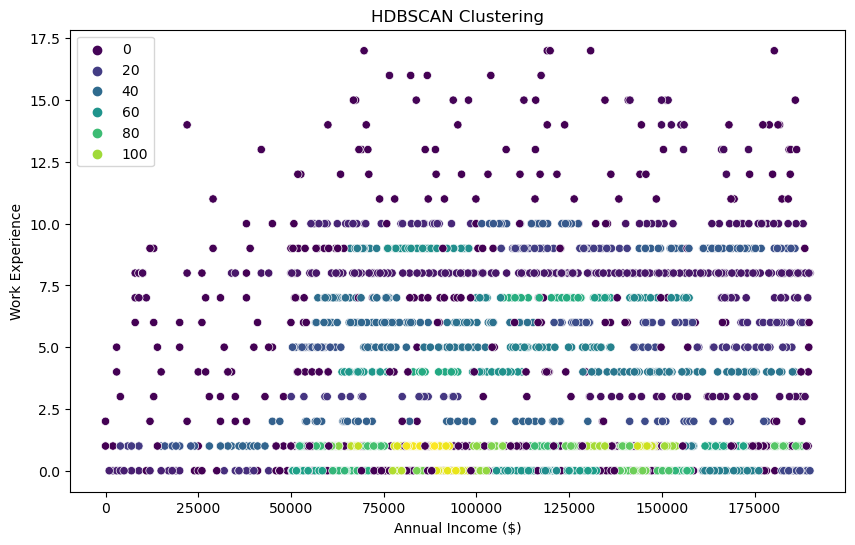

In [13]:
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# dataset1 = pd.read_csv("your_dataset.csv")  # Replace with your dataset file

# Select the features for clustering
X = dataset1[['Annual Income ($)', 'Work Experience']].to_numpy()

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Create an HDBSCAN clusterer
clusterer = hdbscan.HDBSCAN()

# Fit the HDBSCAN clusterer to the data and obtain cluster labels
cluster_labels = clusterer.fit_predict(X_std)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=cluster_labels, palette='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Work Experience')
plt.title('HDBSCAN Clustering')
plt.show()


In [14]:
# for Q2.(E)... 


In [15]:
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score


X = dataset1[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]


min_samples_values = [5, 10, 20 ,50 ]
min_cluster_size_values = [10, 15, 20]

best_silhouette_score = -1
best_min_samples = None
best_min_cluster_size = None

for min_samples in min_samples_values:
    for min_cluster_size in min_cluster_size_values:
        clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        cluster_labels = clusterer.fit_predict(X)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_min_samples = min_samples
            best_min_cluster_size = min_cluster_size

print(f"Best Silhouette Score: {best_silhouette_score}")

Best Silhouette Score: 0.43083310507011485


# for the 2 dataset 


In [16]:
dataset2

world_rank                        university_name  \
0             1                     Harvard University   
1             2     California Institute of Technology   
2             3  Massachusetts Institute of Technology   
3             4                    Stanford University   
4             5                   Princeton University   
...         ...                                    ...   
2598    601-800                    Yeungnam University   
2599    601-800            Yıldız Technical University   
2600    601-800               Yokohama City University   
2601    601-800           Yokohama National University   
2602    601-800                     Yuan Ze University   

                       country  teaching international  research  citations  \
0     United States of America      99.7          72.4      98.7       98.8   
1     United States of America      97.7          54.6      98.0       99.9   
2     United States of America      97.8          82.3      91.4       99.9   
3     United States of America      98.3          29.5      98.1       99.2   
4     United States of America      90.9          70.3      95.4       99.9   
...                        ...       ...           ...       ...        ...   
2598               South Korea      18.6          24.3      10.9       26.5   
2599                    Turkey      14.5          14.9       7.6       19.3   
2600                     Japan      24.0          16.1      10.2       36.4   
2601                     Japan      20.1          23.3      16.0       13.5   
2602                    Taiwan      16.2          17.7      18.3       28.6   

     income total_score num_students  student_staff_ratio  \
0      34.5        96.1       20,152                  8.9   
1      83.7        96.0        2,243                  6.9   
2      87.5        95.6       11,074                  9.0   
3      64.3        94.3       15,596                  7.8   
4         -        94.2        7,929                  8.4   
...     ...         ...          ...                  ...   
2598   35.4           -       21,958                 15.3   
2599   44.0           -       31,268                 28.7   
2600   37.9           -        4,122                  3.7   
2601   40.4           -       10,117                 12.1   
2602   39.8           -        8,663                 20.6   

     international_students female_male_ratio  year  
0                       25%               NaN  2011  
1                       27%           33 : 67  2011  
2                       33%           37 : 63  2011  
3                       22%           42 : 58  2011  
4                       27%           45 : 55  2011  
...                     ...               ...   ...  
2598                     3%           48 : 52  2016  
2599                     2%           36 : 64  2016  
2600                     3%               NaN  2016  
2601                     8%           28 : 72  2016  
2602                     4%           43 : 57  2016  

[2603 rows x 14 columns]

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.datasets import make_blobs


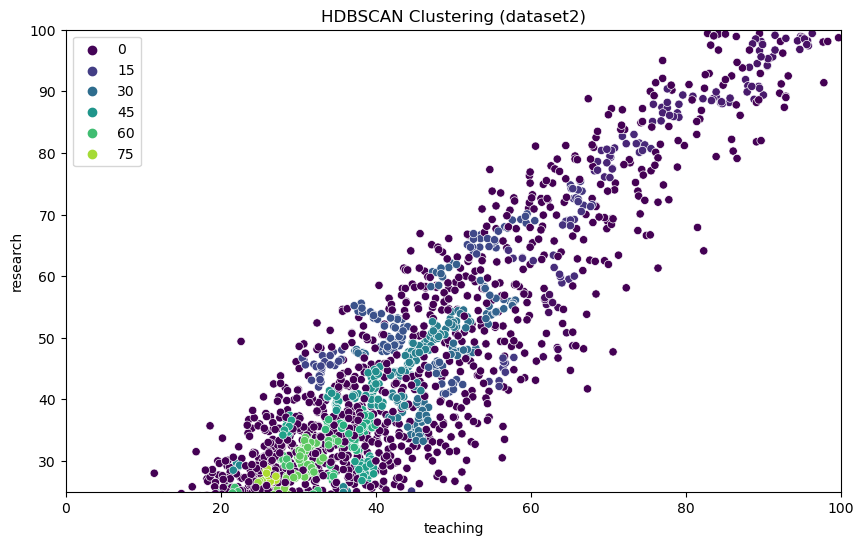

In [18]:
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the categorical features in dataset2
label_encoder = LabelEncoder()
for col in dataset2.columns:
    if dataset2[col].dtype == 'object':
        dataset2[col] = label_encoder.fit_transform(dataset2[col])

X_dataset2 = dataset2[['teaching', 'research']].to_numpy()

# Standardize the data
X_dataset2_std = StandardScaler().fit_transform(X_dataset2)

# Create an HDBSCAN clusterer
clusterer_dataset2 = hdbscan.HDBSCAN()

# Fit the HDBSCAN clusterer to the data and obtain cluster labels
cluster_labels_dataset2 = clusterer_dataset2.fit_predict(X_dataset2_std)

# Visualize the clusters with manually set axis limits
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_dataset2[:, 0], y=X_dataset2[:, 1], hue=cluster_labels_dataset2, palette='viridis')
plt.xlabel('teaching')
plt.ylabel('research')
plt.title('HDBSCAN Clustering (dataset2)')

# Manually set axis limits
plt.xlim(0, 100)
plt.ylim(25, 100)

plt.show()

#Different colors in the scatter plot represent different clusters.
#In HDBSCAN, clusters are not pre-defined by a fixed number but are generated based on the density of data points. 
#Each cluster is assigned a unique color to help visually distinguish it from others.

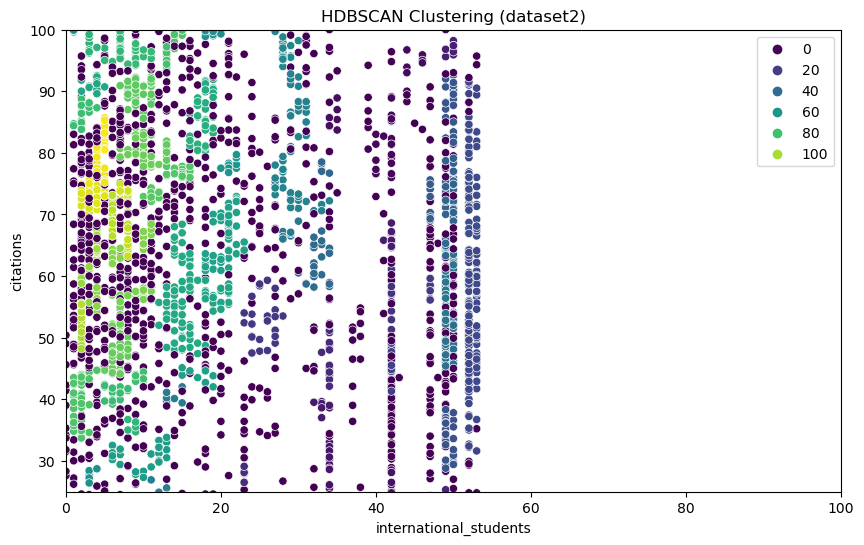

In [19]:
import pandas as pd
import hdbscan
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the categorical features in dataset2
label_encoder = LabelEncoder()
for col in dataset2.columns:
    if dataset2[col].dtype == 'object':
        dataset2[col] = label_encoder.fit_transform(dataset2[col])

X_dataset2 = dataset2[['international_students', 'citations']].to_numpy()

# Standardize the data
X_dataset2_std = StandardScaler().fit_transform(X_dataset2)

# Create an HDBSCAN clusterer
clusterer_dataset2 = hdbscan.HDBSCAN()

# Fit the HDBSCAN clusterer to the data and obtain cluster labels
cluster_labels_dataset2 = clusterer_dataset2.fit_predict(X_dataset2_std)

# Visualize the clusters with manually set axis limits
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_dataset2[:, 0], y=X_dataset2[:, 1], hue=cluster_labels_dataset2, palette='viridis')
plt.xlabel('international_students')
plt.ylabel('citations')
plt.title('HDBSCAN Clustering (dataset2)')

# Manually set axis limits
plt.xlim(0, 100)
plt.ylim(25, 100)

plt.show()

#Different colors in the scatter plot represent different clusters.
#In HDBSCAN, clusters are not pre-defined by a fixed number but are generated based on the density of data points. 
#Each cluster is assigned a unique color to help visually distinguish it from others.

# for the 3 dataset 



In [20]:
dataset3

index userID   latitude   longitude smoker     drink_level  \
0        0  U1001  22.139997 -100.978803  false      abstemious   
1        1  U1002  22.150087 -100.983325  false      abstemious   
2        2  U1003  22.119847 -100.946527  false  social drinker   
3        3  U1004  18.867000  -99.183000  false      abstemious   
4        4  U1005  22.183477 -100.959891  false      abstemious   
..     ...    ...        ...         ...    ...             ...   
133    133  U1134  22.149654 -100.998610  false  casual drinker   
134    134  U1135  22.170396 -100.949936  false  casual drinker   
135    135  U1136  22.149607 -100.997235   true  social drinker   
136    136  U1137  22.144803 -100.944623  false  social drinker   
137    137  U1138  22.152884 -100.939663  false  social drinker   

    dress_preference ambience  transport marital_status        hijos  \
0           informal   family    on foot         single  independent   
1           informal   family     public         single  independent   
2             formal   family     public         single  independent   
3           informal   family     public         single  independent   
4      no preference   family     public         single  independent   
..               ...      ...        ...            ...          ...   
133    no preference   family     public         single  independent   
134         informal   family    on foot         single         kids   
135    no preference  friends  car owner         single  independent   
136           formal   family     public         single  independent   
137           formal  friends     public         single  independent   

     birth_year      interest          personality  religion      activity  \
0          1989       variety    thrifty-protector      none       student   
1          1990    technology  hunter-ostentatious  Catholic       student   
2          1989          none          hard-worker  Catholic       student   
3          1940       variety          hard-worker      none  professional   
4          1992          none    thrifty-protector  Catholic       student   
..          ...           ...                  ...       ...           ...   
133        1991       variety          hard-worker  Catholic       student   
134        1988       variety  hunter-ostentatious  Catholic       student   
135        1990         retro    thrifty-protector  Catholic       student   
136        1989  eco-friendly          hard-worker  Catholic       student   
137        1991       variety    thrifty-protector      none       student   

      color  weight  budget  height  
0     black      69  medium    1.77  
1       red      40     low    1.87  
2      blue      60     low    1.69  
3     green      44  medium    1.53  
4     black      65  medium    1.69  
..      ...     ...     ...     ...  
133   black      52  medium    1.65  
134  purple      66     low    1.54  
135   black      50     low    1.60  
136    blue      72     low    1.78  
137    blue      54  medium    1.55  

[138 rows x 20 columns]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan
from sklearn.datasets import make_blobs


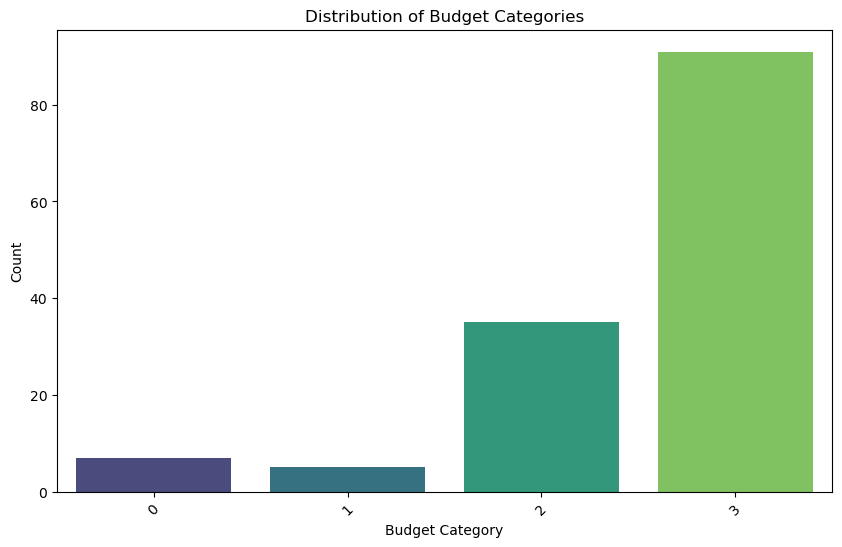

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual data)
# dataset3 = pd.read_csv("your_dataset3.csv")

# Create a count plot for the "budget" attribute
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset3, x="budget", palette="viridis")
plt.xlabel("Budget Category")
plt.ylabel("Count")
plt.title("Distribution of Budget Categories")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


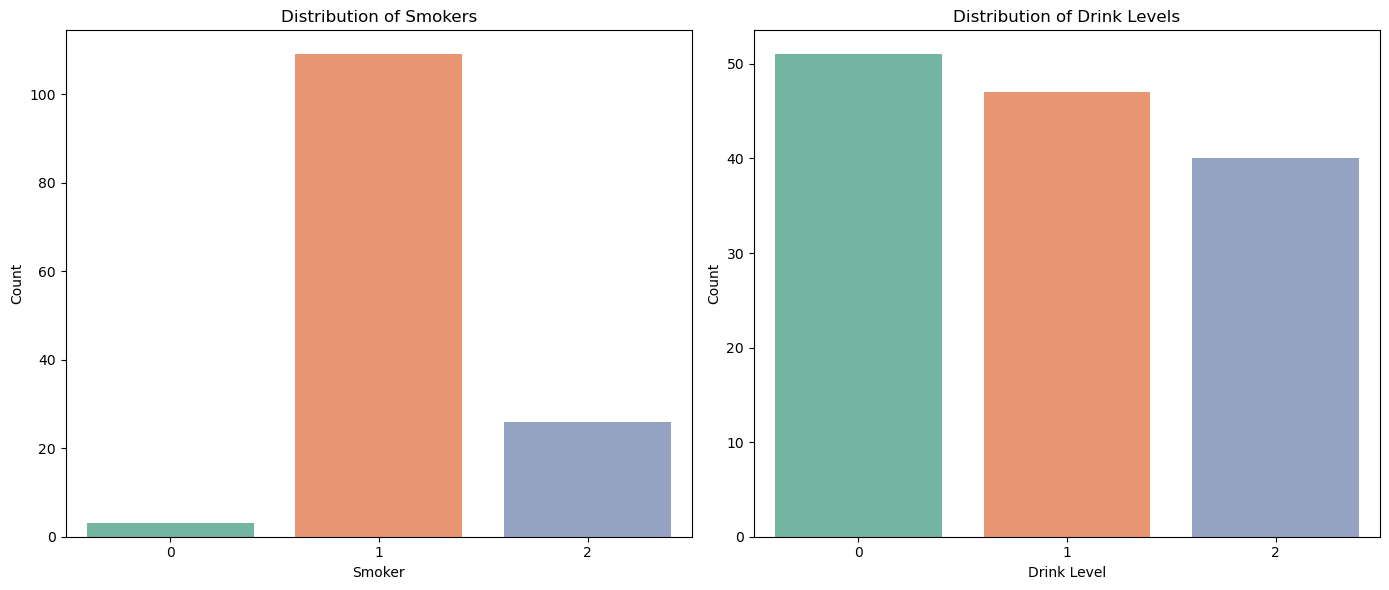

In [24]:
# Visualize the distribution of Smoker and Drink Level
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=dataset3, x="smoker", palette="Set2")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.title("Distribution of Smokers")

plt.subplot(1, 2, 2)
sns.countplot(data=dataset3, x="drink_level", palette="Set2")
plt.xlabel("Drink Level")
plt.ylabel("Count")
plt.title("Distribution of Drink Levels")

plt.tight_layout()
plt.show()


In [25]:
print(dataset3.columns)

Index(['index', 'userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
       'birth_year', 'interest', 'personality', 'religion', 'activity',
       'color', 'weight', 'budget', 'height'],
      dtype='object')


In [42]:
import hdbscan
from sklearn.preprocessing import StandardScaler

# Select features for clustering (e.g., 'latitude' and 'longitude')
X_dataset3 = dataset3[['latitude', 'longitude']].to_numpy()

# Standardize the data
X_dataset3_std = StandardScaler().fit_transform(X_dataset3)

# Create an HDBSCAN clusterer
clusterer_dataset3 = hdbscan.HDBSCAN()

# Fit the HDBSCAN clusterer to the data and obtain cluster labels
cluster_labels_dataset3 = clusterer_dataset3.fit_predict(X_dataset3_std)


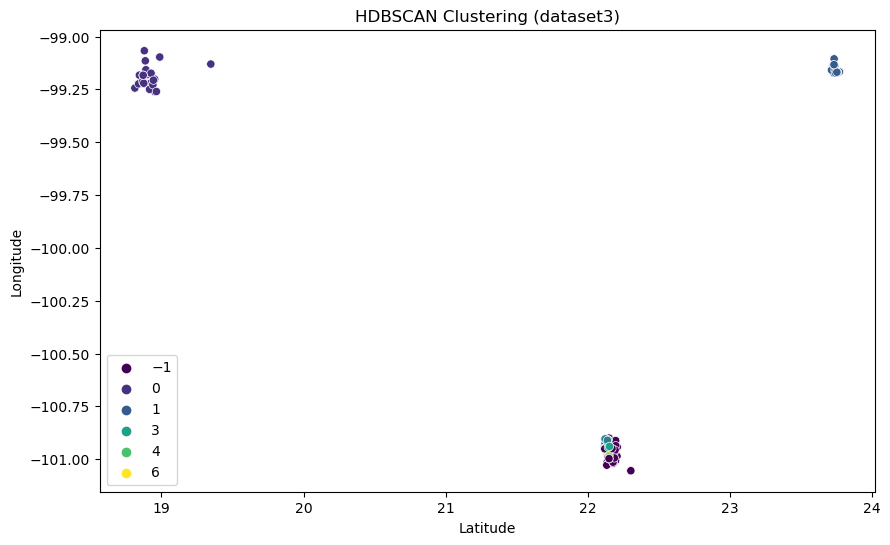

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters with manually set axis limits
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_dataset3[:, 0], y=X_dataset3[:, 1], hue=cluster_labels_dataset3, palette='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('HDBSCAN Clustering (dataset3)')

# Optionally set axis limits
# plt.xlim(min_value, max_value)
# plt.ylim(min_value, max_value)

plt.show()


In [44]:
#Q2.e 
import hdbscan
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# the features for clustering are  (e.g., 'latitude' and 'longitude')
X_dataset3 = dataset3[['latitude', 'longitude']].to_numpy()

# Standardize the data
X_dataset3_std = StandardScaler().fit_transform(X_dataset3)

best_score = -1
best_min_cluster_size = 2  # Start with a minimum cluster size of 2

for min_cluster_size in range(2, 10):  # You can adjust the range as needed
    clusterer_dataset3 = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    cluster_labels_dataset3 = clusterer_dataset3.fit_predict(X_dataset3_std)
    
    if len(set(cluster_labels_dataset3)) > 1:  # Ensure more than one cluster is formed
        score = silhouette_score(X_dataset3_std, cluster_labels_dataset3)
        if score > best_score:
            best_score = score
            best_min_cluster_size = min_cluster_size

print(f"Best Silhouette Score: {best_score} with min_cluster_size={best_min_cluster_size}")


Best Silhouette Score: 0.9790894033818434 with min_cluster_size=6


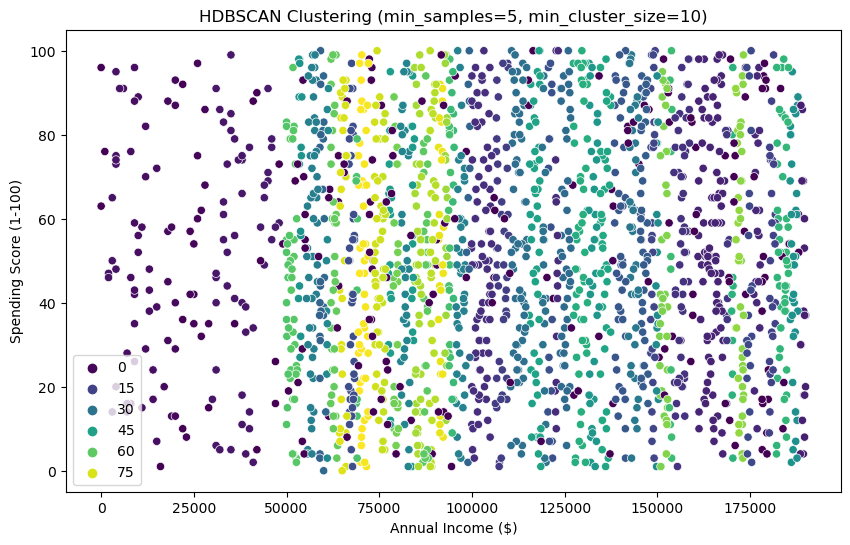

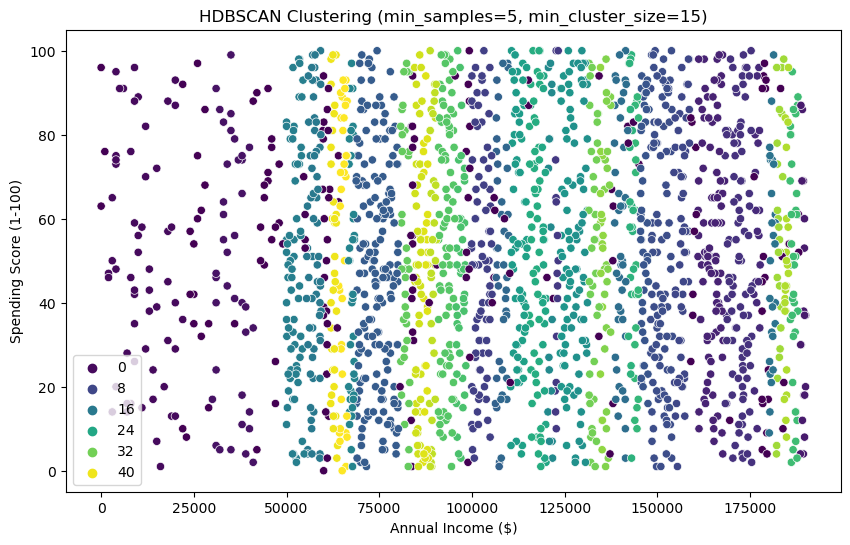

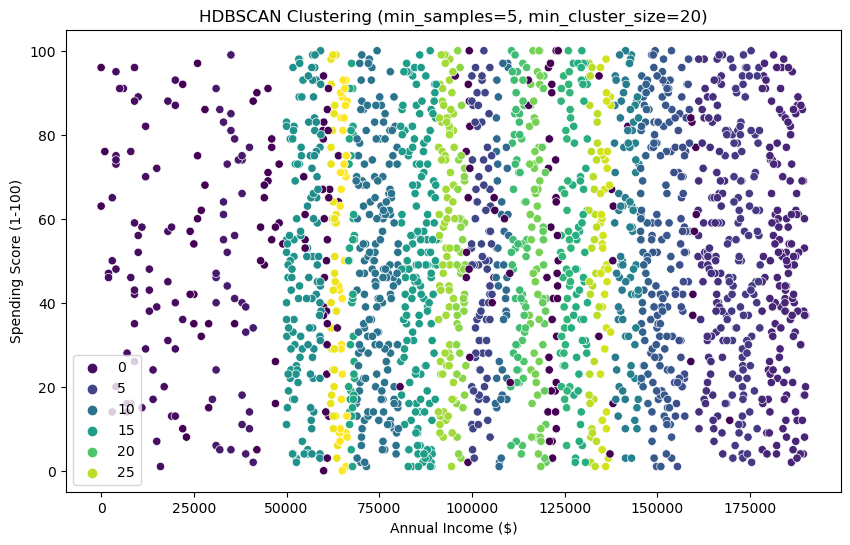

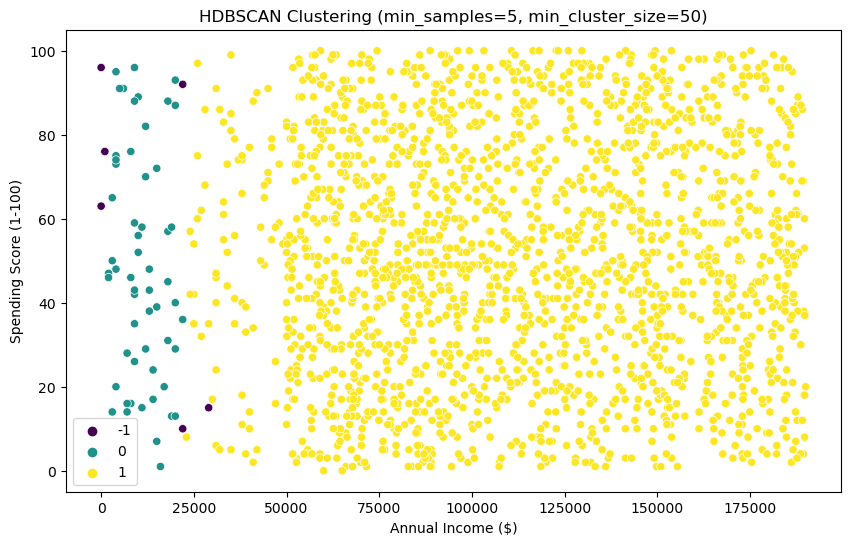

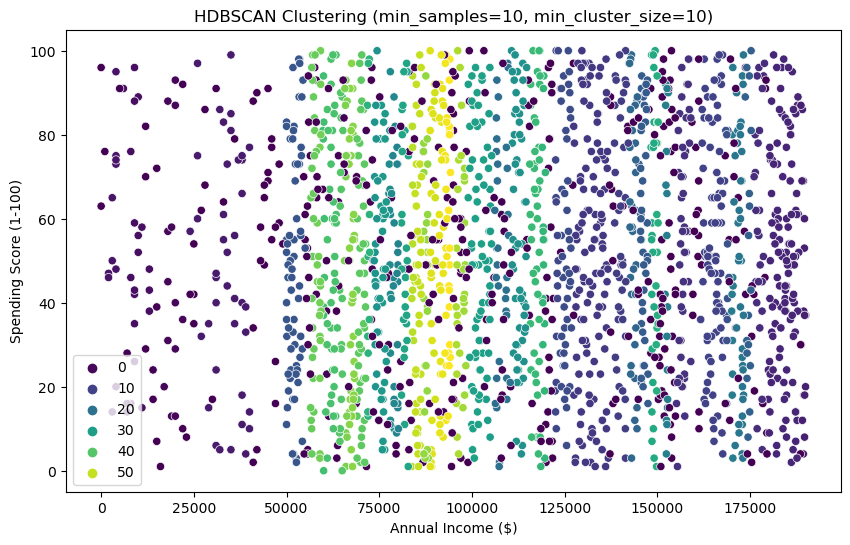

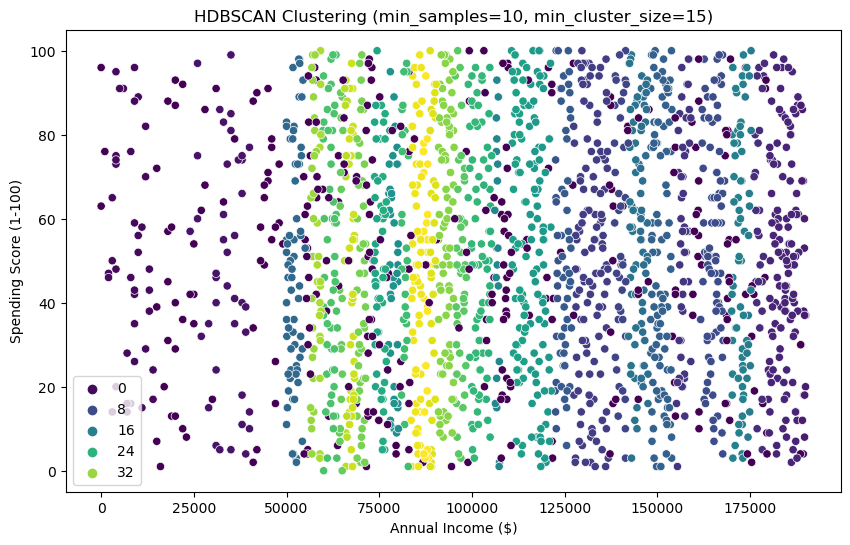

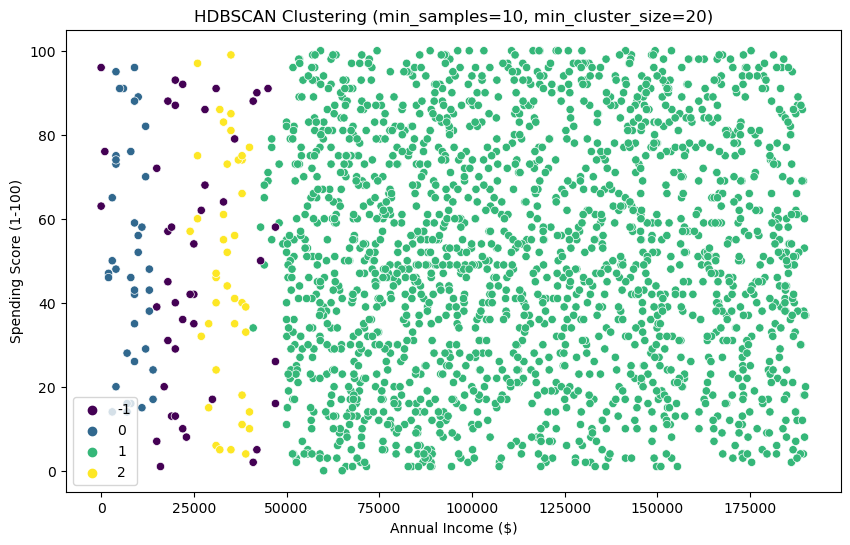

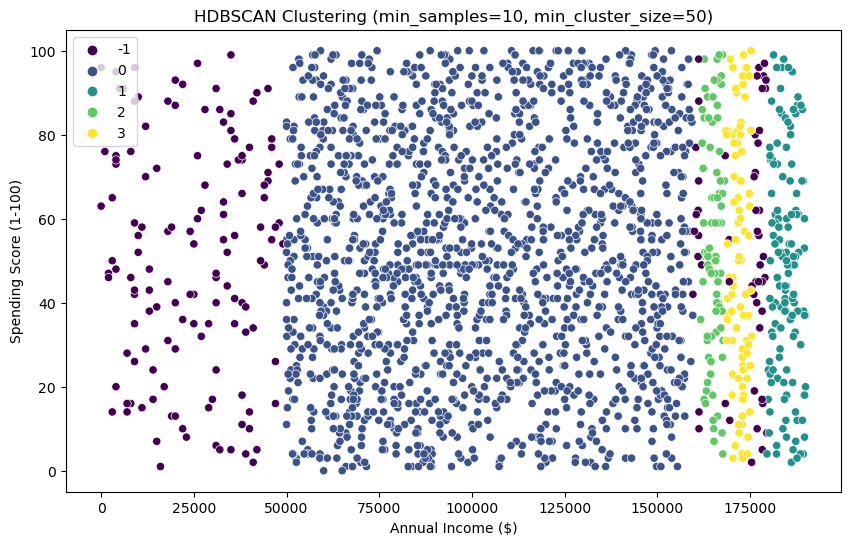

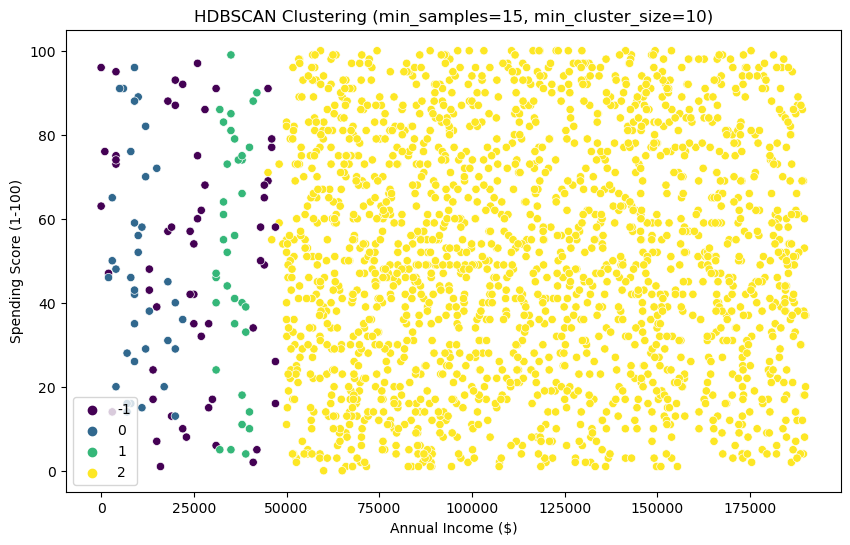

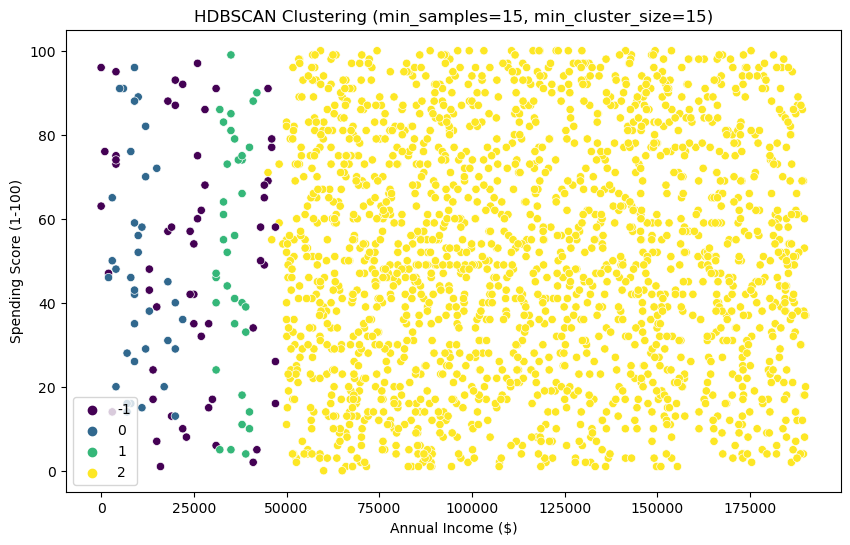

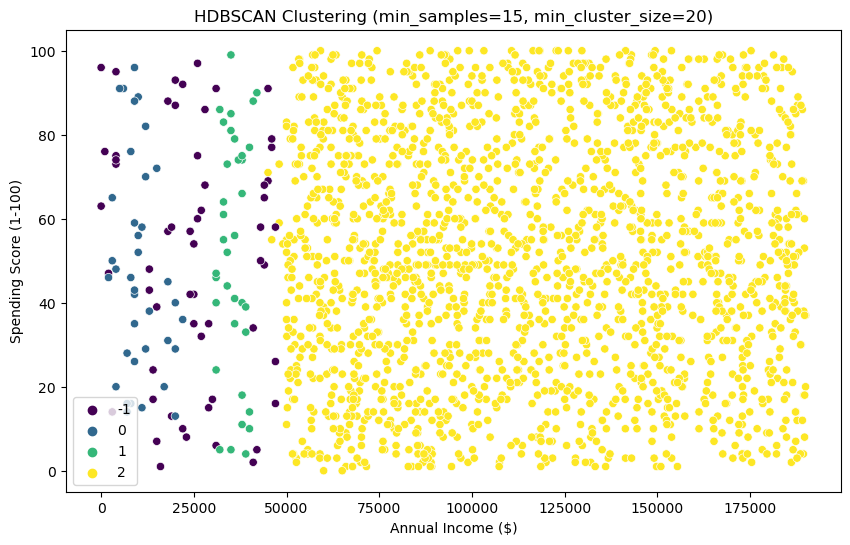

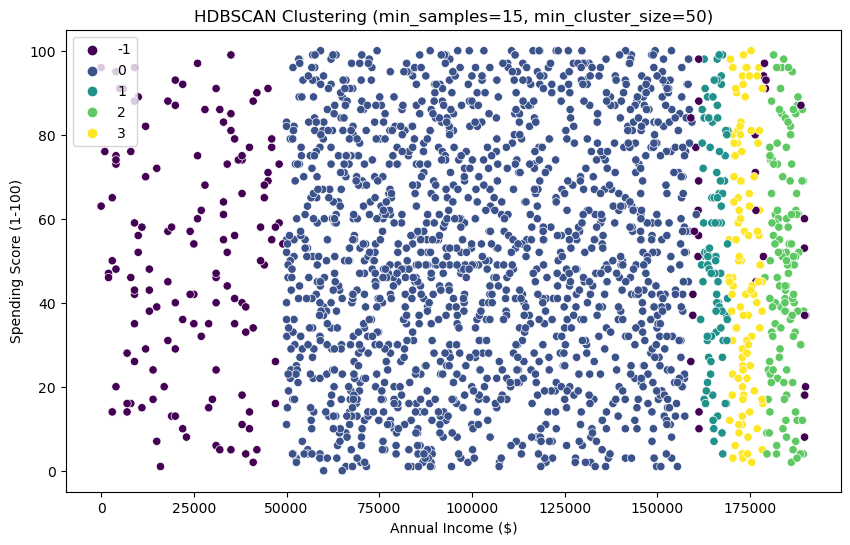

In [30]:
#Q2.(Q2..e)For the 3 dataset and the 2 dataset applying density based algorithm
#here for the third and the second dataset respectively the hdbscan is not that suitable 
#i.e it is not giving accurate results and we can infer nothing from them.

#For the visualize and playing with parameters for the 1st dataset of the hdbscan algorithm

import pandas as pd
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns



# Select relevant features for clustering
X = dataset1[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Experiment with different HDBSCAN parameters
min_samples_values = [5, 10 , 15]
min_cluster_size_values = [10, 15, 20,50]

for min_samples in min_samples_values:
    for min_cluster_size in min_cluster_size_values:
        clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        cluster_labels = clusterer.fit_predict(X)
        
        # Visualize the clustering results
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=X, x='Annual Income ($)', y='Spending Score (1-100)', hue=cluster_labels, palette='viridis')
        plt.title(f'HDBSCAN Clustering (min_samples={min_samples}, min_cluster_size={min_cluster_size})')
        plt.show()



In [ ]:
#When you set min_samples = 5 and min_cluster_size = 50 in the HDBSCAN algorithm 
#and the resulting graph shows clusters labeled as -1, 0, and 1, it means the following:

#Cluster -1: The label -1 is typically assigned to data points that are considered as noise or outliers by HDBSCAN.
    #In other words, points labeled as -1 do not belong to any of the primary clusters
    #(0 or 1) and are considered as isolated data points that don't fit well into any existing cluster.

#Cluster 0 and Cluster 1: These are the primary clusters detected by HDBSCAN.
#The algorithm has identified two meaningful clusters in your data, and it has assigned the labels 0 and 1
#to these clusters. Each cluster represents a group of data points that share similar characteristics based 
#on the density-based clustering approach used by HDBSCAN.

In [ ]:
#The Silhouette Score is a metric used to evaluate the quality of clusters in a dataset.
#It provides a measure of how well-separated the clusters are and how similar data points
#within the same cluster are to each other
#compared to data points in neighboring clusters. 

In [31]:
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score


X = dataset1[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]


min_samples_values = [5, 10, 20 ,50 ]
min_cluster_size_values = [10, 15, 20]

best_silhouette_score = -1
best_min_samples = None
best_min_cluster_size = None

for min_samples in min_samples_values:
    for min_cluster_size in min_cluster_size_values:
        clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        cluster_labels = clusterer.fit_predict(X)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)
        
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_min_samples = min_samples
            best_min_cluster_size = min_cluster_size

# Print the best parameter settings and silhouette score
print(f"Best min_samples: {best_min_samples}, Best min_cluster_size: {best_min_cluster_size}")
print(f"Best Silhouette Score: {best_silhouette_score}")


Best min_samples: 5, Best min_cluster_size: 20
Best Silhouette Score: 0.43083310507011485


In [ ]:
#as here the sihouette score is greater than o and close to +1 here which indicates 
#that this dataset has clusters whoch are well sepearted 

In [ ]:
#A high positive Silhouette Score (close to +1) indicates that the clusters are well-separated,
#and data points within each cluster are similar to each other.

# Q(2g...)

In [ ]:
#There are several ways to confirm the validity of clustering results for different types of clustering algorithms, 
#such as density-based clustering, hierarchical clustering,
#and prototype-based clustering.

In [32]:
# for the 1 dataset we are computing the Silhouette Coefficient to check the validation of the clustering..

import numpy as np
import hdbscan


# HDBSCAN Clustering
hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
hdb_labels = hdb.fit_predict(dataset1)

# Silhouette Coefficient
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(dataset1, hdb_labels)
print("Silhouette Coefficient (Dataset 1):", silhouette_avg)


Silhouette Coefficient (Dataset 1): 0.2408602804844685


In [ ]:
# for the 2 dataset is remaning 


In [33]:
# import the librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Load the dataset
dataset2 = pd.read_csv('/Users/DELL/Desktop/DMG/assignment3/drive-download-20231027T110025Z-001/HBC_timesData_2.csv')

In [34]:
dataset2.head()



world_rank  university_name  country  teaching  international  research  \
0           0              156       70      99.7            581      98.7   
1         111               53       70      97.7            408      98.0   
2         129              254       70      97.8            670      91.4   
3         143              412       70      98.3            161      98.1   
4         155              358       70      90.9            563      95.4   

   citations  income  total_score  num_students  student_staff_ratio  \
0       98.8      97          414           290                  8.9   
1       99.9     514          413           279                  6.9   
2       99.9     536          412            41                  9.0   
3       99.2     379          407           167                  7.8   
4       99.9       0          406           737                  8.4   

   international_students  female_male_ratio  year  
0                      18                 69  2011  
1                      20                 25  2011  
2                      27                 29  2011  
3                      15                 34  2011  
4                      20                 37  2011

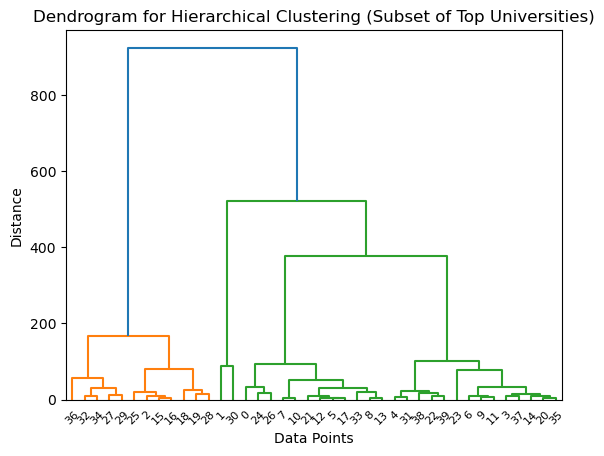

In [36]:
# for the dataset 2 :--
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


top_n = 40  
subset_data = dataset2.nlargest(top_n, 'teaching')  


numerical_columns = subset_data[['teaching', 'international', 'research', 'citations']]

# Replace non-numeric values with 0 in the selected columns
numerical_columns = numerical_columns.apply(pd.to_numeric, errors='coerce').fillna(0)

# Perform hierarchical clustering with 'ward' linkage
fusions = linkage(numerical_columns, method='ward', metric='euclidean')

# Create and display the dendrogram
dendrogram(fusions)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Dendrogram for Hierarchical Clustering (Subset of Top Universities)")
plt.show()


In [ ]:
#inference 
#The vertical lines in the dendrogram represent data points (universities). 
#The closer two data points are in the dendrogram, the more similar they are in terms of the selected attributes 
#(e.g., teaching, international, research, and citations). 
#Data points that share a common vertical line are clustered together
#because they have similar values in these attributes.



In [ ]:
#The height or distance on the y-axis at which two data points
#or clusters merge indicates their degree of similarity. 



In [ ]:
#Q2...done 